In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# Reading data
data=pd.read_csv("C:/Users/PC PC/Desktop/DS Assignment/Ml projects/4. Logistic Regresssion/bank-full1.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# processing the data
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
data.shape

(45211, 17)

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
# EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
data['job'].astype("category").value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [11]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
# list of variables which needs to be changed
col = ['default','housing','loan','y']

# function definition
def convert(x):
    return x.map({'yes':1,'no':0})

# calling the function
data[col] = data[col].apply(convert)

In [13]:
# Insights of data

In [14]:
print("1.Total no of clients--",len(data))
print("2.Clients works in these areas--",data["job"].unique())
print('3.Clients are either,',data["marital"].unique())
print("4.Average yearly balance of the client in the bank is €",data["balance"].mean())
print('5.Number of clients having housing loan--',len(data[data['housing']=='yes']))
print("6.Highest no of contacts performed during this marketing campaign for any client--",data["campaign"].max())
print("7.Types of outcomes from previous marketing campaign",data["poutcome"].unique())
print("8.Percentage of successful outcomes from previous marketing campaigns",(len(data[data['poutcome']=='success'])/45211)*100,"%")

1.Total no of clients-- 45211
2.Clients works in these areas-- ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
3.Clients are either, ['married' 'single' 'divorced']
4.Average yearly balance of the client in the bank is € 1362.2720576850766
5.Number of clients having housing loan-- 0
6.Highest no of contacts performed during this marketing campaign for any client-- 63
7.Types of outcomes from previous marketing campaign ['unknown' 'failure' 'other' 'success']
8.Percentage of successful outcomes from previous marketing campaigns 3.34210700935613 %


In [15]:
data=data.rename({"default":"credit","loan":'personal',"y":'deposit'},axis=1)
print(data.head(2))

   age         job  marital  education  credit  balance  housing  personal  \
0   58  management  married   tertiary       0     2143        1         0   
1   44  technician   single  secondary       0       29        1         0   

   contact  day month  duration  campaign  pdays  previous poutcome  deposit  
0  unknown    5   may       261         1     -1         0  unknown        0  
1  unknown    5   may       151         1     -1         0  unknown        0  


In [16]:
data['job'].astype("category").value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [17]:
data['marital'].astype("category").value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [18]:
data['education'].astype("category").value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [19]:
data['contact'].astype("category").value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [20]:
data['month'].astype("category").value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [21]:
data['poutcome'].astype("category").value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


Text(0, 0.5, 'Jobs')

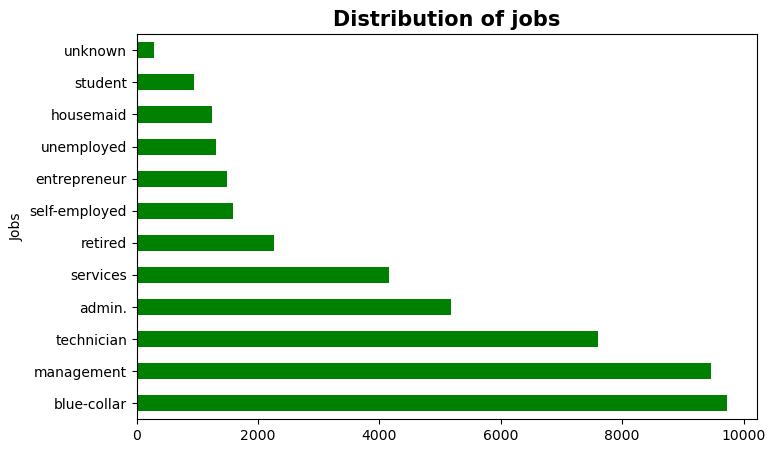

In [22]:
plt.figure(figsize=(8,5))
print(data["job"].value_counts())
data["job"].value_counts().plot(kind='barh',color="green")
plt.title("Distribution of jobs",weight="bold",fontsize=15)
plt.ylabel('Jobs')

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


C:\Users\PC PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Marital status')

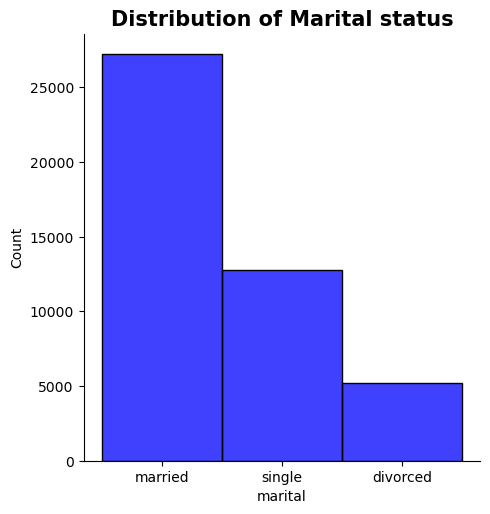

In [23]:
sns.displot(x="marital",data=data,color="blue")
print(data["marital"].value_counts())
plt.title("Distribution of Marital status",weight="bold",fontsize=15)

C:\Users\PC PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of clients having credit')

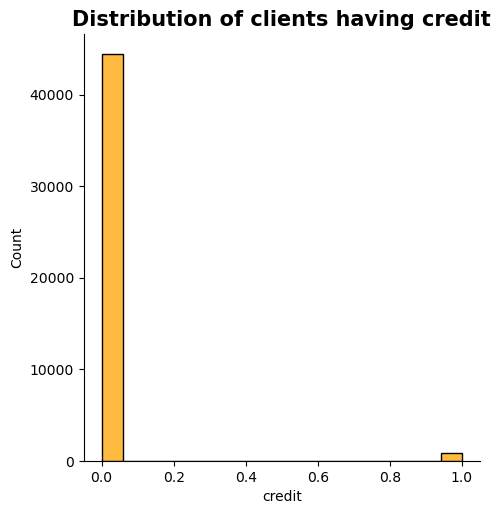

In [24]:
sns.displot(x="credit",data=data,color="orange")
plt.title("Distribution of clients having credit",weight="bold",fontsize=15)

housing
1    25130
0    20081
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Clients having Housing Loan')

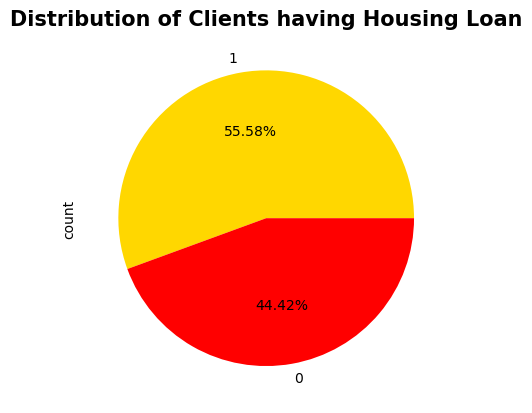

In [25]:
data["housing"].value_counts().plot(kind="pie",autopct='%.2f%%',colors=["gold",'r'])
print(data["housing"].value_counts())
plt.title("Distribution of Clients having Housing Loan",fontweight='bold',fontsize=15)

personal
0    37967
1     7244
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Clients having Personal Loan')

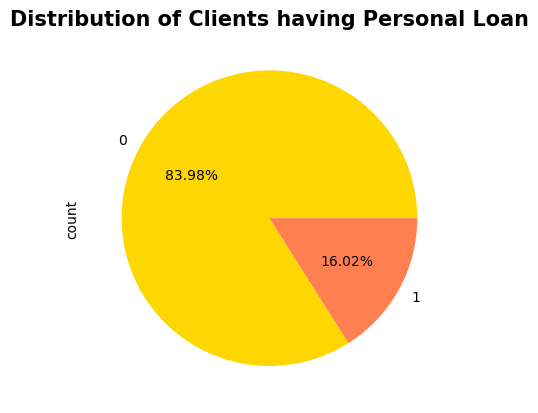

In [26]:
data["personal"].value_counts().plot(kind="pie",autopct='%.2f%%',colors=["gold",'coral'])
print(data["personal"].value_counts())
plt.title("Distribution of Clients having Personal Loan",fontweight='bold',fontsize=15)

deposit
0    39922
1     5289
Name: count, dtype: int64


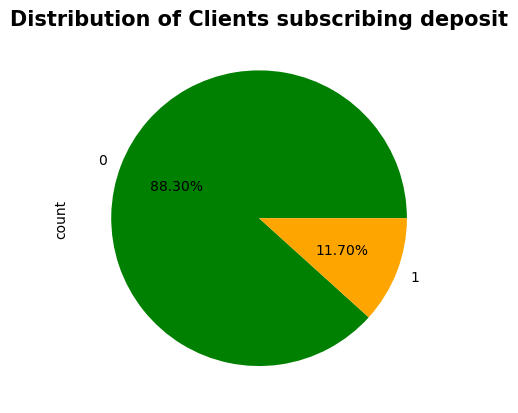

In [27]:
plt.title("Distribution of Clients subscribing deposit",fontweight='bold',fontsize=15)
data["deposit"].value_counts().plot(kind="pie",colors=["green","orange"],autopct='%.2f%%')
print(data["deposit"].value_counts())

In [28]:
# Building model

In [29]:
from sklearn.linear_model import LogisticRegression
X=data[['age','balance','day','duration','campaign','pdays','previous']]
y=data['deposit']

In [30]:

def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return X_train,X_test,y_train,y_test
print("Calling train_test function--")
X_train,X_test,y_train,y_test=train_test(X,y)



Calling train_test function--
(36168, 7)
(36168,)
(9043, 7)
(9043,)


In [31]:
def modelling(X_train,y_train,X_test):
    model=LogisticRegression(max_iter=5000)
    model_train=model.fit(X_train,y_train)
    print("Model training is completed")
    return model_train
print("Calling modelling function--")
model_train=modelling(X_train,y_train,X_test)



Calling modelling function--
Model training is completed


In [32]:
def prediction(X_test):
    pred=model_train.predict(X_test)
    return pred
print("Calling prediction function--")
pred=prediction(X_test)
print(pred)


Calling prediction function--
[0 0 0 ... 0 0 0]


Confusion_matrix--
[[7874  122]
 [ 860  187]]


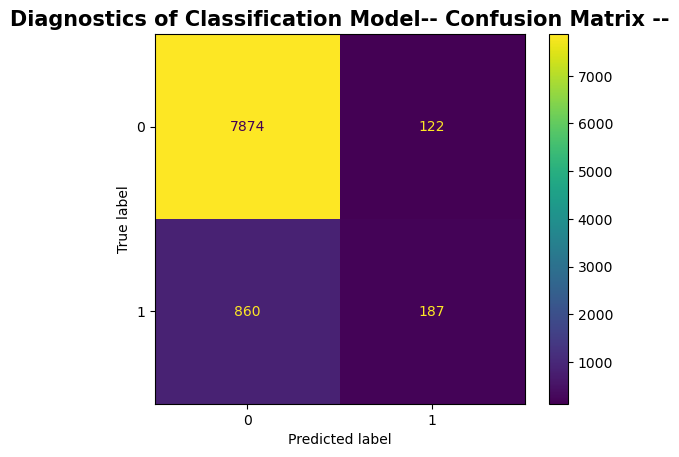

*********************************************
Accuracy score-- 89.141
Misclassification-- 0.10859228132256993
Classification Report--
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7996
           1       0.61      0.18      0.28      1047

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
result=confusion_matrix(y_test,pred)
print("Confusion_matrix--")
print(result)
ConfusionMatrixDisplay(result,display_labels=model_train.classes_).plot()
plt.title("Diagnostics of Classification Model-- Confusion Matrix --",fontweight="bold",fontsize=15)
plt.grid(False)
plt.show()
print("*********************************************")
accuracy_score(y_test,pred)
1-accuracy_score(y_test,pred)
classification_report(y_test,pred)
print("Accuracy score--",round(accuracy_score(y_test,pred)*100,3))
print( "Misclassification--",1-accuracy_score(y_test,pred))
print("Classification Report--")
print(classification_report(y_test,pred))
